In [151]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [152]:
# unfortunately while doing analysis I found there are some "infinte" values created in the process
pd.set_option('use_inf_as_na', True)

In [153]:
# import data
df = pd.read_csv("C:/Users/DataS/Desktop/eda_gold/data.csv")

In [154]:
# take a peak into the data
df.head()

,countryc,year,agrgdp,popn,infmort,schprim,schsec,grtdsbp,grlndsbp,aiddsbp,...,dcurexpp,dcapexpp,dprirepp,dcnlnagp,dcnlnenp,dcnlninp,dcnlntacp,dcnlnedup,dcnlnhthp,dcnlnothp
0,Burkina Faso,1970,35.44188862,5633000,141.3999939,13,1,13.3182802200317,1.02303504943848,14.3413200378418,...,1.79769313486232e+308,1.79769313486232e+308,1.79769313486232e+308,1.79769313486232e+308,1.79769313486232e+308,1.79769313486232e+308,1.79769313486232e+308,1.79769313486232e+308,1.79769313486232e+308,1.79769313486232e+308
1,Burkina Faso,1971,36.16739069,5740700,139.1999969,13.6,1.2,16.7043991088867,0.655763506889343,17.3601703643799,...,1.79769313486232e+308,1.79769313486232e+308,1.79769313486232e+308,1.79769313486232e+308,1.79769313486232e+308,1.79769313486232e+308,1.79769313486232e+308,1.79769313486232e+308,1.79769313486232e+308,1.79769313486232e+308
2,Burkina Faso,1972,37.51058767,5848380,137,14.2,1.4,20.9176502227783,2.97720909118652,23.8948593139648,...,1.79769313486232e+308,1.79769313486232e+308,1.79769313486232e+308,1.79769313486232e+308,1.79769313486232e+308,1.79769313486232e+308,1.79769313486232e+308,1.79769313486232e+308,1.79769313486232e+308,1.79769313486232e+308
3,Burkina Faso,1973,34.83428571,5958700,135,14.8,1.6,25.9791507720947,3.87817406654358,29.8573207855225,...,1.79769313486232e+308,1.79769313486232e+308,-4.26292991638184,0.290098994970322,0.0578910000622272,2.53049802780151,-0.38238000869751,0,0,-0.11642000079155
4,Burkina Faso,1974,36.48014145,6075700,133,15.4,1.8,38.6305809020996,6.66203498840332,45.2926216125488,...,1.79769313486232e+308,1.79769313486232e+308,1.79769313486232e+308,1.79769313486232e+308,1.79769313486232e+308,1.79769313486232e+308,1.79769313486232e+308,1.79769313486232e+308,1.79769313486232e+308,1.79769313486232e+308


In [155]:
# show number of rows and columns
df.shape

(471, 50)

In [156]:
# display the column names
df.columns

# column names are not easy to read, so need to take a look at the data disctionary and documentation. 
# Also good idea to check the complete definition of each column names, for example, which measure of GDP was used 
# (e.g. total, nominal, USD etc.)

Index(['countryc', 'year', 'agrgdp', 'popn', 'infmort', 'schprim', 'schsec',
       'grtdsbp', 'grlndsbp', 'aiddsbp', 'totexpp', 'agexpp', 'enexpp',
       'indexpp', 'tacexpp', 'eduexpp', 'hthexpp', 'prirepp', 'curexpp',
       'capexpp', 'gdnpp', 'd0', 'cnlnagp', 'cnlnenp', 'cnlninp', 'cnlntacp',
       'cnlnedup', 'cnlnhthp', 'cnlnothp', 'dgrtdsbp', 'dgrlndsbp', 'daiddsbp',
       'dtotexpp', 'dagexpp', 'denexpp', 'dindexpp', 'dtacexpp', 'deduexpp',
       'dhthexpp', 'dothexpp', 'dcurexpp', 'dcapexpp', 'dprirepp', 'dcnlnagp',
       'dcnlnenp', 'dcnlninp', 'dcnlntacp', 'dcnlnedup', 'dcnlnhthp',
       'dcnlnothp'],
      dtype='object')

In [157]:
# rename the columns I'll be working with
df = df.rename(columns={"countryc": "country", "agrgdp": "agri_gdp", "popn": "population", "infmort": "infant_mort",
                  "schprim": "school_enroll_primary", "schsec": "school_enroll_secondary", 
                   "grtdsbp": "grants_percap", "grlndsbp": "loans_percap",
                  "aiddsbp": "aid_percap", "totexpp": "govt_expenditure", "agexpp": "agri_expenditure", 
                   "enexpp": "energy_expenditure", "indexpp": "industry_expenditure", "tacexpp": "comms_expenditure",
                   "eduexpp": "edu_expenditure", "hthexpp": "health_expenditure", 
                   "gdnpp": "gdp_percap","d0": "num_donors", "cnlnagp": "loan_to_agri", "cnlnenp": "loan_to_energy", 
                   "cnlninp": "loan_to_indus", 
                   "cnlntacp": "loan_to_comm", "cnlnedup": "loan_to_edu", "cnlnhthp": "loan_to_health", 
                   "cnlnothp": "loan_to_others", 
                  })
# rest of the columns are calculated columns 
# the derived first differences the authors added for modeling purposes, I don't need them

In [158]:
# double checking the column names
df.columns

Index(['country', 'year', 'agri_gdp', 'population', 'infant_mort',
       'school_enroll_primary', 'school_enroll_secondary', 'grants_percap',
       'loans_percap', 'aid_percap', 'govt_expenditure', 'agri_expenditure',
       'energy_expenditure', 'industry_expenditure', 'comms_expenditure',
       'edu_expenditure', 'health_expenditure', 'prirepp', 'curexpp',
       'capexpp', 'gdp_percap', 'num_donors', 'loan_to_agri', 'loan_to_energy',
       'loan_to_indus', 'loan_to_comm', 'loan_to_edu', 'loan_to_health',
       'loan_to_others', 'dgrtdsbp', 'dgrlndsbp', 'daiddsbp', 'dtotexpp',
       'dagexpp', 'denexpp', 'dindexpp', 'dtacexpp', 'deduexpp', 'dhthexpp',
       'dothexpp', 'dcurexpp', 'dcapexpp', 'dprirepp', 'dcnlnagp', 'dcnlnenp',
       'dcnlninp', 'dcnlntacp', 'dcnlnedup', 'dcnlnhthp', 'dcnlnothp'],
      dtype='object')

In [159]:
# subseting data frame to get rid of the columns I am not interested in
df = df.loc[:, : "loan_to_others"]
df.head()

# looks like three additional columns I need to drop as well. Otherwise all good

,country,year,agri_gdp,population,infant_mort,school_enroll_primary,school_enroll_secondary,grants_percap,loans_percap,aid_percap,...,capexpp,gdp_percap,num_donors,loan_to_agri,loan_to_energy,loan_to_indus,loan_to_comm,loan_to_edu,loan_to_health,loan_to_others
0,Burkina Faso,1970,35.44188862,5633000,141.3999939,13,1,13.3182802200317,1.02303504943848,14.3413200378418,...,1.79769313486232e+308,246.414001464844,10,0.0470721982419491,0,0.320718288421631,0.00690389983355999,0,0,0.289336889982224
1,Burkina Faso,1971,36.16739069,5740700,139.1999969,13.6,1.2,16.7043991088867,0.655763506889343,17.3601703643799,...,1.79769313486232e+308,237.336502075195,11,0.0304461997002363,0,0.317928194999695,0.00292750005610287,0,0,0.124712198972702
2,Burkina Faso,1972,37.51058767,5848380,137,14.2,1.4,20.9176502227783,2.97720909118652,23.8948593139648,...,1.79769313486232e+308,270.989410400391,13,0.533692181110382,0,0.185248598456383,0.567323684692383,0,0,0.616943776607513
3,Burkina Faso,1973,34.83428571,5958700,135,14.8,1.6,25.9791507720947,3.87817406654358,29.8573207855225,...,3.56338310241699,291.868499755859,16,0.823791682720184,0.0578907988965511,2.71574592590332,0.184943303465843,0,0,0.500525176525116
4,Burkina Faso,1974,36.48014145,6075700,133,15.4,1.8,38.6305809020996,6.66203498840332,45.2926216125488,...,3.30492210388184,292.736785888672,16,0.749651789665222,0.332871198654175,3.32410192489624,0.572612285614014,0,0,1.24158203601837


In [160]:
# drop some additional columns
df = df.drop(["capexpp", "curexpp", "prirepp"], axis=1)

In [161]:
# checking data types
df.info()

# other than the first two columns all are objects, which I know for a fact are floating numbers. 
# So need to change data types

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 471 entries, 0 to 470
Data columns (total 26 columns):
country                    471 non-null object
year                       471 non-null int64
agri_gdp                   471 non-null object
population                 471 non-null object
infant_mort                471 non-null object
school_enroll_primary      471 non-null object
school_enroll_secondary    471 non-null object
grants_percap              471 non-null object
loans_percap               471 non-null object
aid_percap                 471 non-null object
govt_expenditure           471 non-null object
agri_expenditure           471 non-null object
energy_expenditure         471 non-null object
industry_expenditure       471 non-null object
comms_expenditure          471 non-null object
edu_expenditure            471 non-null object
health_expenditure         471 non-null object
gdp_percap                 471 non-null object
num_donors                 471 non-null object
loa

In [162]:
# converting data types from objects to float
df.loc[:, "agri_gdp":] = df.loc[:, "agri_gdp":].astype("float")

In [163]:
# now double check again if the changes were made correctly
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 471 entries, 0 to 470
Data columns (total 26 columns):
country                    471 non-null object
year                       471 non-null int64
agri_gdp                   452 non-null float64
population                 468 non-null float64
infant_mort                468 non-null float64
school_enroll_primary      441 non-null float64
school_enroll_secondary    436 non-null float64
grants_percap              468 non-null float64
loans_percap               468 non-null float64
aid_percap                 468 non-null float64
govt_expenditure           309 non-null float64
agri_expenditure           299 non-null float64
energy_expenditure         299 non-null float64
industry_expenditure       298 non-null float64
comms_expenditure          298 non-null float64
edu_expenditure            304 non-null float64
health_expenditure         304 non-null float64
gdp_percap                 446 non-null float64
num_donors                 446 non

In [164]:
# one final thing is to check if there are empty/null cells in the data
# If there is any, I do not have to fix them right away, but good to keep in mind this piece of info, as this
# might be useful if I want to do any kind of predictive modeling

df.isna().sum()

# so there are some null values, need to think about them later on

country                      0
year                         0
agri_gdp                    19
population                   3
infant_mort                  3
school_enroll_primary       30
school_enroll_secondary     35
grants_percap                3
loans_percap                 3
aid_percap                   3
govt_expenditure           162
agri_expenditure           172
energy_expenditure         172
industry_expenditure       173
comms_expenditure          173
edu_expenditure            167
health_expenditure         167
gdp_percap                  25
num_donors                  25
loan_to_agri                 3
loan_to_energy               3
loan_to_indus                3
loan_to_comm                 3
loan_to_edu                  3
loan_to_health               3
loan_to_others               3
dtype: int64

In [165]:
# I know this is a time series/panel dataset, first need to to know the time period unders study
df["year"].unique()
# 1970 to 1996

array([1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980,
       1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991,
       1992, 1993, 1994, 1995, 1996], dtype=int64)

In [166]:
# now the dataset is ready to fire up, I'm now thinking what to do with it.
# I probably could extract hundreds of different peices of information from this dataset if 
# I had no knowledge of these things in Africa

In [167]:
# let's ask some questions

In [168]:
# since this data set is about aids to Africa, the first question I am interested in
# Q. Which countries took aid?

print(" Number of countries: ", df["country"].nunique())
print(df["country"].unique())

# so 18 countries are in the dataset (for perspective, there are 54 countries in Africa). 
# I am sure other countries also take aids, so not sure why these specific countries were chosen.
# It would be interesting to see these countries in the map to find any pattern, but that's a bit of work, 
# so I'm not going there.

 Number of countries:  18
['Burkina Faso' 'Botswana' 'Cameroon' 'Ethiopia' 'Ghana' 'Gambia, The'
 'Kenya' 'Liberia' 'Lesotho' 'Madagascar' 'Mauritius' 'Malawi' 'Nigeria'
 'Sudan' 'Swaziland' 'Zaire' 'Zambia' 'Zimbabwe']


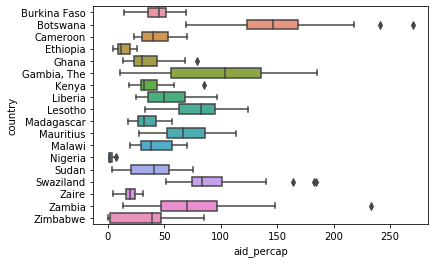

In [169]:
# This is a panel dataset, meaning every country has a time series of its own for all variables. The next question:
# Q. One average which countries received comparatively higher aid over the years?
sns.boxplot(y="country", x="aid_percap", data=df)

# on a per capita basis on average Botswana received the highest aid, close to $150, and seems NIgeria received the
# least in a given year

# This is a per capital basis aid I could go a bit further to know total grants taken by ALL people over the entire 
# 25 years in a calculated column first by multiplying per capita with total population and then summing for ehte period
# but I', not going there, instead if you are interested try it out!

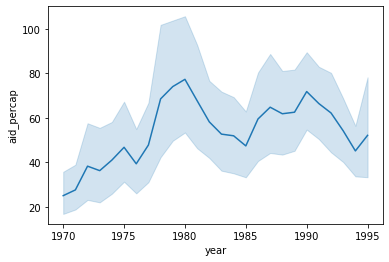

In [170]:
# Q. what is the overall trend in giving aid during the study period
sns.lineplot(x="year", y="aid_percap", data=df)


# oevrall aids increased, from $25/cap in 1970 to about $50/cap in 1995, which peaked around 1980 ( I could go ahead 
# and find the reason why so much aid was given in that peiod)

In [171]:
# I could go on and on asking similar kind of questions for each of the variables, but I'll stop here. I'll move on 
# a bit more interesting questions, some bi-variate analysis

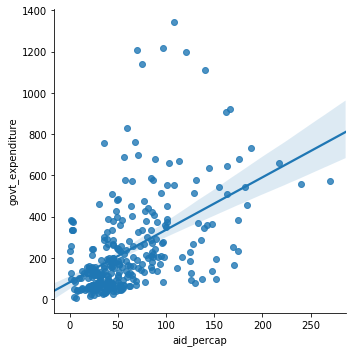

In [172]:
# first I want to see if govt expenditure has any correlation with aid
sns.lmplot(x="aid_percap", y="govt_expenditure", data=df, fit_reg=True)

# The answer is kind of obvious, but yes 
# the upward trensline shows that yes, the higher they receive aid the more government expenditure.

# Building models

In [173]:
# import necessary libraries
import numpy
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics


# d1 = df[["gdp_percap", "agri_gdp", "population", "aid_percap"]]
data = df[[ "gdp_percap", "agri_expenditure"]]

# remove NA values
data=data.dropna()

# select x, y data for modeling
y = data.iloc[:, 1].values
X = data.iloc[:, :-1].values

# Split X and y into X_
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)

# instantiate model
model = LinearRegression()

# fit model
model.fit(X_train, y_train)

# Model evaluation

print("Model score: ", model.score(X_test, y_test))
print("Intercept: ", model.intercept_)
print("Coefficients: ", model.coef_)

print("*******")

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))


Model score:  0.4587828707861653
Intercept:  0.8355629908191169
Coefficients:  [0.02365732]
*******
Mean Absolute Error: 9.623160933594171
Mean Squared Error: 163.25628045836336
Root Mean Squared Error: 12.777178110144797


In [174]:
model.predict(X_test)

array([42.89960315, 26.18875916, 26.76779459,  7.91084516, 31.99203948,
        8.31015701, 10.33975838, 15.30240969, 27.70261393,  6.55210366,
       15.23984428, 10.18416429,  6.55170622, 24.79664343, 13.58212662,
       17.1806022 ,  5.11893127, 14.64250273, 28.27812617, 10.80706409,
       73.21381032,  7.8541717 ,  5.44559404,  8.57222131, 12.88013132,
        8.88611109, 18.11881333, 32.30403194,  9.56635867, 22.62704455,
       17.70322769, 17.49549984, 25.63706885, 31.14324073, 24.96534334,
       18.27863308, 26.84231572, 17.01746719, 14.39096178,  6.64185246,
       10.12544912,  7.45003352,  8.20934122, 24.56877567, 16.36888641,
        8.93165836, 40.18781067,  8.14738515, 25.31939886, 65.07448518,
       11.00016494, 43.28656436, 39.43929272, 26.45580213,  6.31215672,
       42.50850075,  6.92169441,  9.93948849, 51.29182654, 16.42197243,
        6.24978191,  3.63579716, 11.60183395, 10.65063974, 64.55418587,
       51.80130794, 15.34048608,  6.69490852, 27.32705398,  8.43

In [175]:
y_pred = model.predict(X_test)
s = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df1 = s.head()
df1

,Actual,Predicted
0,39.199532,42.899603
1,43.408241,26.188759
2,19.982460,26.767795
3,15.238520,7.910845
4,9.300573,31.992039


# Extras

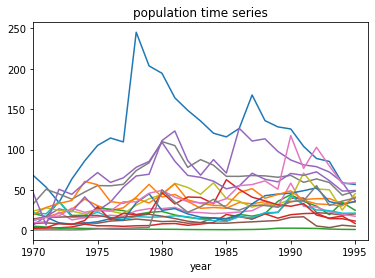

In [176]:
x=df.pivot(index='year',columns='country',values='grants_percap')
#the arguments to the "pivot" function do the following
## assigns the column "date" as the index 
## converts country data from rows to columns
## applies this transformation to the 'pcturb' variable.

x.plot.line(title='population time series', legend=False)

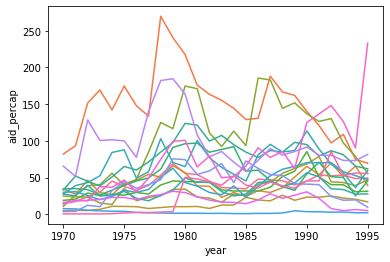

In [177]:
sns.lineplot(x="year", y="aid_percap", hue="country", data=df, legend=False)

In [178]:
# hierarchical group by // make a variable wide form using
x=df.groupby(["year", "country"])["population", "agri_gdp"].mean()
y = x.unstack()
y.head()

population                                                             \
country   Botswana Burkina Faso   Cameroon    Ethiopia Gambia, The      Ghana   
year                                                                            
1970      623500.0    5633000.0  6506000.0  28937000.0    464000.0  8614000.0   
1971      647390.0    5740700.0  6664330.0  29698260.0    478990.0  8876770.0   
1972      672870.0    5848380.0  6835870.0  30475760.0    495250.0  9137910.0   
1973      699530.0    5958700.0  7021850.0  31273540.0    512480.0  9388140.0   
1974      727030.0    6075700.0  7222900.0  32098120.0    530170.0  9621420.0   

                                                      ...   agri_gdp  \
country       Kenya    Lesotho    Liberia Madagascar  ...    Liberia   
year                                                  ...              
1970     11498000.0  1064000.0  1385000.0  6745000.0  ...  24.101480   
1971     11903370.0  1084630.0  1426840.0  6901230.0  ...  24.425000   
1972     12329860.0  1106900.0  1469960.0  7062230.0  ...  22.523776   
1973     12778060.0  1131220.0  1514530.0  7230290.0  ...  29.920565   
1974     13248300.0  1157870.0  1560820.0  7408570.0  ...  32.281255   

                                                                           \
country Madagascar     Malawi  Mauritius    Nigeria      Sudan  Swaziland   
year                                                                        
1970     24.430279  43.971631  16.207741  41.284791  42.933898  33.195592   
1971     24.307715  44.330262  17.167986  40.041774  44.250714  37.074830   
1972     24.993516  45.631388  18.369201  38.265539  44.864341  33.055266   
1973     26.778566  41.578638  19.931755  35.137757  43.509218  35.677530   
1974     34.222350  41.172398  29.942267  31.825249  45.854620  34.970674   

                                          
country      Zaire     Zambia   Zimbabwe  
year                                      
1970     14.744036  10.651953  15.133531  
1971     13.638958  13.040901  17.123288  
1972     13.827999  12.874766  17.514970  
1973     13.783921  11.309112  14.827586  
1974     14.592043  10.645454  17.587940  

[5 rows x 36 columns]

In [179]:
x.head()

population   agri_gdp
year country                            
1970 Botswana        623500.0  33.055092
     Burkina Faso   5633000.0  35.441889
     Cameroon       6506000.0  31.363922
     Ethiopia      28937000.0        NaN
     Gambia, The     464000.0  32.544379

In [180]:
x["population"]

year  country     
1970  Botswana          623500.0
      Burkina Faso     5633000.0
      Cameroon         6506000.0
      Ethiopia        28937000.0
      Gambia, The       464000.0
                         ...    
1995  Zambia           8978000.0
      Zimbabwe        11011000.0
1996  Madagascar             NaN
      Mauritius              NaN
      Zambia                 NaN
Name: population, Length: 471, dtype: float64

In [181]:
## panel data filtering
pan = df[df["year"].isin([1990])]
pan.head()

,country,year,agri_gdp,population,infant_mort,school_enroll_primary,school_enroll_secondary,grants_percap,loans_percap,aid_percap,...,health_expenditure,gdp_percap,num_donors,loan_to_agri,loan_to_energy,loan_to_indus,loan_to_comm,loan_to_edu,loan_to_health,loan_to_others
20,Burkina Faso,1990,32.334722,9016000.0,105.400000,37.0,8.0,35.053070,10.197580,45.250641,...,3.423738,342.223694,21.0,1.530403,2.097616,0.728107,0.990899,0.780972,0.509496,2.260681
46,Botswana,1990,5.456681,1277000.0,55.800000,114.0,42.0,125.423897,14.686280,140.110199,...,55.913792,2693.399902,20.0,0.608548,2.558605,0.000000,0.000000,2.704656,0.000000,10.595940
72,Cameroon,1990,23.994870,11484000.0,66.200000,101.0,28.0,44.158539,21.212099,65.370644,...,9.889886,1034.937012,20.0,1.810232,1.115994,0.120903,5.110894,0.100652,0.135940,2.469081
98,Ethiopia,1990,49.268665,51180000.0,124.200000,31.0,13.0,19.305910,4.054906,23.360809,...,1.705038,181.058899,25.0,1.287848,1.092818,0.870323,0.508247,0.142707,0.013317,3.309632
124,Ghana,1990,47.857695,14870000.0,82.740001,77.0,37.0,39.549290,28.968639,68.517929,...,6.098817,473.326202,25.0,1.457413,1.471117,3.467705,1.930314,0.148575,0.422343,15.795020
